In [2]:
import tensorflow as tf

# Load images of hand-witten digits 0-9
mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [ ]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [4]:
x_train.shape

(60000, 28, 28)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [25]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-26.901688 , -11.378917 , -13.198875 ,  16.638687 , -20.234148 ,
         20.422192 , -27.892376 , -14.784954 , -17.374779 ,  -3.6431623]],
      dtype=float32)

In [14]:
tf.nn.softmax(predictions).numpy()

array([[0.1210187 , 0.09954795, 0.13467443, 0.10974935, 0.10202358,
        0.0863392 , 0.09689587, 0.09245765, 0.08784085, 0.06945233]],
      dtype=float32)

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
loss_fn(y_train[:1], predictions).numpy()

2.4494715

In [18]:
for i in range(10):
    print("_________________________")
    print("Epochs: ", i)
    model.fit(x_train, y_train, epochs=1)
    model.evaluate(x_test, y_test, verbose=2)

_________________________
Epochs:  0
Train on 60000 samples
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2850 - accuracy: 0.9150
10000/10000 - 0s - loss: 0.1404 - accuracy: 0.9569
_________________________
Epochs:  1
Train on 60000 samples
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1178 - accuracy: 0.9642
10000/10000 - 0s - loss: 0.1040 - accuracy: 0.9686
_________________________
Epochs:  2
Train on 60000 samples
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0816 - accuracy: 0.9748
10000/10000 - 0s - loss: 0.0843 - accuracy: 0.9729
_________________________
Epochs:  3
Train on 60000 samples
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0610 - accuracy: 0.9808
10000/10000 - 0s - loss: 0.0830 - accuracy: 0.9748
_________________________
Epochs:  4
Train on 60000 samples
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0492 - accuracy: 0.9839
10000/10000 - 0s

In [19]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.1067 - accuracy: 0.9732


[0.1067306107827273, 0.9732]

In [20]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.1067 - accuracy: 0.9732


[0.1067306107827273, 0.9732]

In [21]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [22]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.58809223e-13, 7.78321158e-12, 4.18938051e-10, 1.34118238e-07,
        8.34229821e-13, 3.68875069e-12, 1.30553092e-21, 9.99999881e-01,
        1.08416646e-13, 2.73940604e-09]], dtype=float32)>

In [55]:
import numpy

first_ten = 0

predictions = model.predict(x_test)
for i in range(y_test.size):
    if numpy.argmax(predictions[i]) != y_test[i]:
        if (first_ten < 10):
            print(i)
            first_ten += 1

7
18
96
124
149
151
209
247
321
444


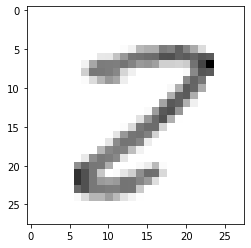

In [63]:
import matplotlib.pyplot as plot # L5

plot.imshow(x_test[444], cmap = plot.cm.binary)
plot.show()